In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller, kpss

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning

In [8]:
warnings.filterwarnings("ignore", category=InterpolationWarning)

# Functions

In [9]:
def plot_func(dec_time_series, title="Decomposition of Time Series"):
    plt.rcParams.update({'figure.figsize': (14,10)})
    dec_time_series.plot()
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()  

In [10]:
def ad_test(series, significance_level=0.05):
    result = adfuller(series)
    test_statistic = result[0]
    p_value = result[1]
    critical_value_1 = result[4]['1%']
    
    if p_value < significance_level and test_statistic < critical_value_1:
        print('AD_TEST: the data of {} is stationary series'.format(series.name))
    else:
        print('AD_TEST: the data of {} is not stationary series'.format(series.name))

In [11]:
def test_kpss(series, significance_level=0.05):
    result = kpss(series, regression='c')
    test_statistic = result[0]
    p_value = result[1]
    critical_value_5 = result[3]['5%']
    
    if p_value > significance_level and test_statistic < critical_value_5:
        print('KPSS_TEST: The data of {} is a stationary series'.format(series.name))
    else:
        print('KPSS_TEST: The data of {} is not a stationary series'.format(series.name))

# EDA

## Initial data analysis

In [12]:
data = pd.read_csv('data/Microsoft_Stock.csv')

In [13]:
sns.set(style="whitegrid")

In [14]:
data.head(5)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


*Let's take away the hours we don't need*

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [16]:
data['Date'] = pd.to_datetime(pd.to_datetime(data['Date']).dt.date)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [20]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [21]:
data

,Date,Open,High,Low,Close,Volume
0,2015-04-01,40.60,40.76,40.31,40.72,36865322
1,2015-04-02,40.66,40.74,40.12,40.29,37487476
2,2015-04-06,40.34,41.78,40.18,41.55,39223692
3,2015-04-07,41.61,41.91,41.31,41.53,28809375
4,2015-04-08,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,2021-03-25,235.30,236.94,231.57,232.34,34061853
1507,2021-03-26,231.55,236.71,231.55,236.48,25479853
1508,2021-03-29,236.59,236.80,231.88,235.24,25227455
1509,2021-03-30,233.53,233.85,231.10,231.85,24792012


*Divide dates into days, months, and years*

In [23]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [24]:
data

,Date,Open,High,Low,Close,Volume,year,month,day
0,2015-04-01,40.60,40.76,40.31,40.72,36865322,2015,4,1
1,2015-04-02,40.66,40.74,40.12,40.29,37487476,2015,4,2
2,2015-04-06,40.34,41.78,40.18,41.55,39223692,2015,4,6
3,2015-04-07,41.61,41.91,41.31,41.53,28809375,2015,4,7
4,2015-04-08,41.48,41.69,41.04,41.42,24753438,2015,4,8
...,...,...,...,...,...,...,...,...,...
1506,2021-03-25,235.30,236.94,231.57,232.34,34061853,2021,3,25
1507,2021-03-26,231.55,236.71,231.55,236.48,25479853,2021,3,26
1508,2021-03-29,236.59,236.80,231.88,235.24,25227455,2021,3,29
1509,2021-03-30,233.53,233.85,231.10,231.85,24792012,2021,3,30


In [25]:
data.set_index('Date', inplace=True)

<Axes: xlabel='Date', ylabel='Close'>

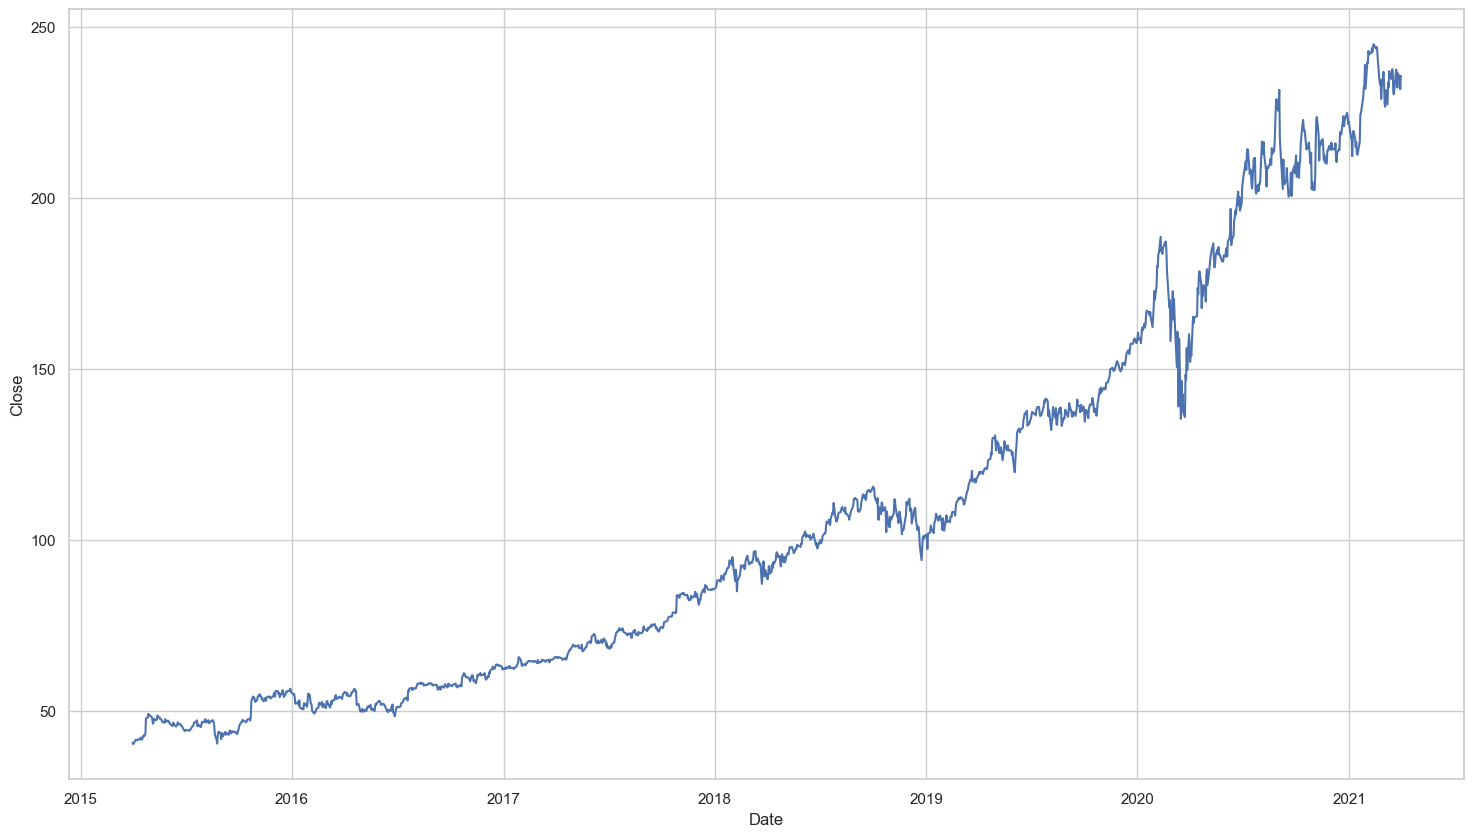

In [26]:
plt.figure(figsize=(18, 10))
sns.lineplot(data, x = data.index, y = data['Close'])

So, we can see that in the autumn of 2015, the shares went up, and after 2019, the shares began to rise rapidly in value.  
*For data science: We see the trend and possible seasonality in 365 days, and we keep it in mind.*

## Candlestick Charts

Let's take a look at how the price has changed over the months and years, and divide the data by these parameters.

In [29]:
yearly_data = data.resample('Y').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

monthly_data = data.resample('M').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})


In [30]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=True,
                    subplot_titles=('Monthly candlestick chart', 'Yearly candlestick chart'))


In [31]:
fig.add_trace(go.Candlestick(
    x=monthly_data.index,
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close'],
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Candlestick(
    x=yearly_data.index,
    open=yearly_data['Open'],
    high=yearly_data['High'],
    low=yearly_data['Low'],
    close=yearly_data['Close'],
    showlegend=False
), row=1, col=2)

fig.update_layout(
    title='Candlestick charts by month and year',
    xaxis_title='Data',
    yaxis_title='Price',
    xaxis2_title='Data',
    height=600
)

fig.show()

We can see that on the monthly chart, the price was falling, but usually it was rising. On the annual chart, the price did not fall, but only rose.

## Multiplicative or additive. Decomposition.

*Now let's work a little on the timeseries and find out what kind of series it is: multiplicative or additive.  
Let's identify the trend and seasonality.*

In [32]:
series_log = np.log(data['Close']) 

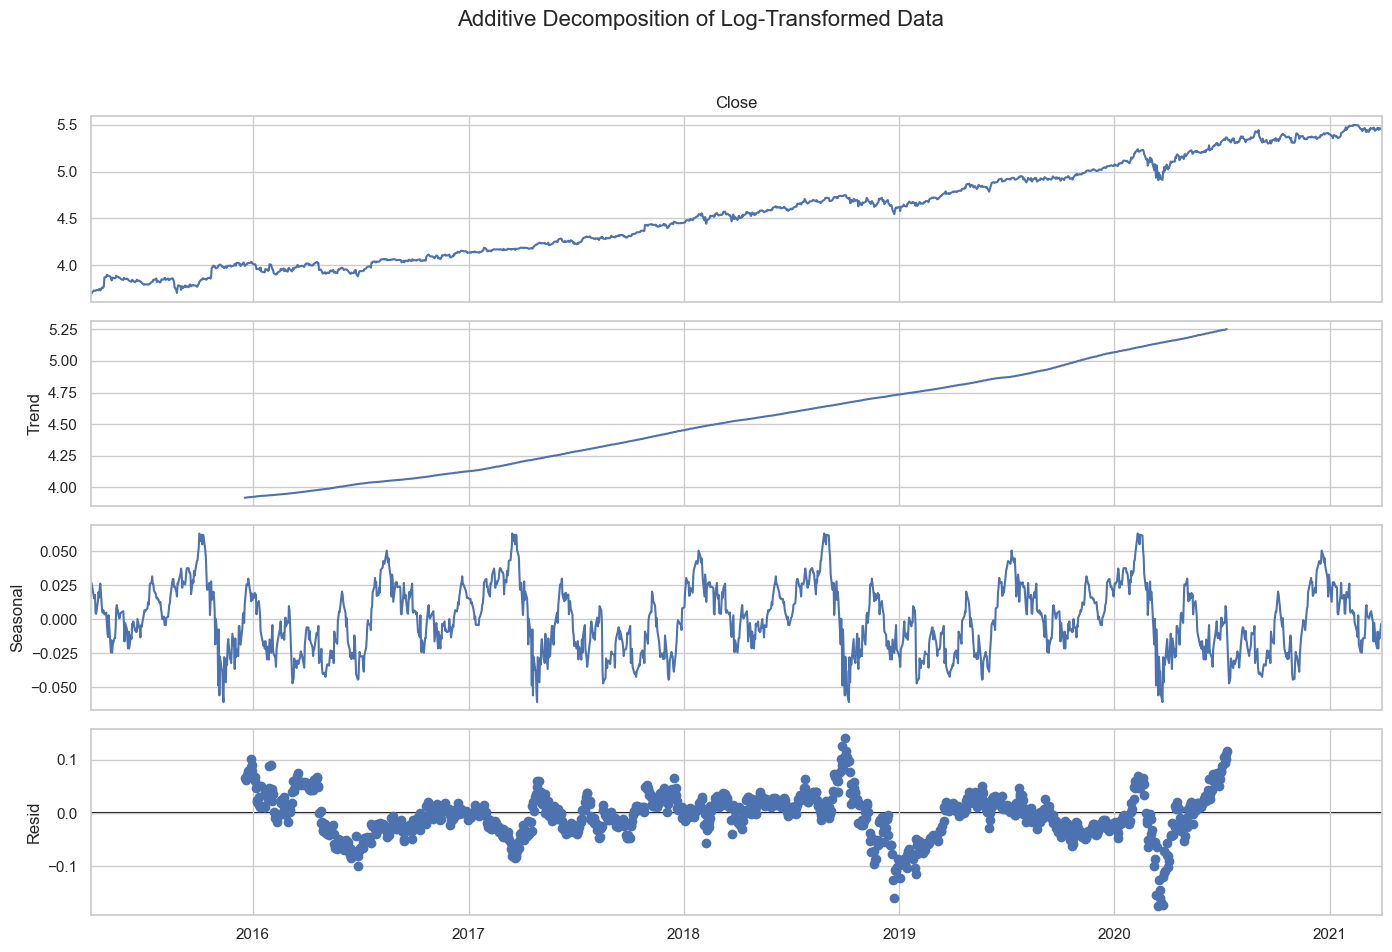

In [33]:
decomposition_log_additive = sm.tsa.seasonal_decompose(series_log, model='additive', period=365)
plot_func(decomposition_log_additive, title='Additive Decomposition of Log-Transformed Data')

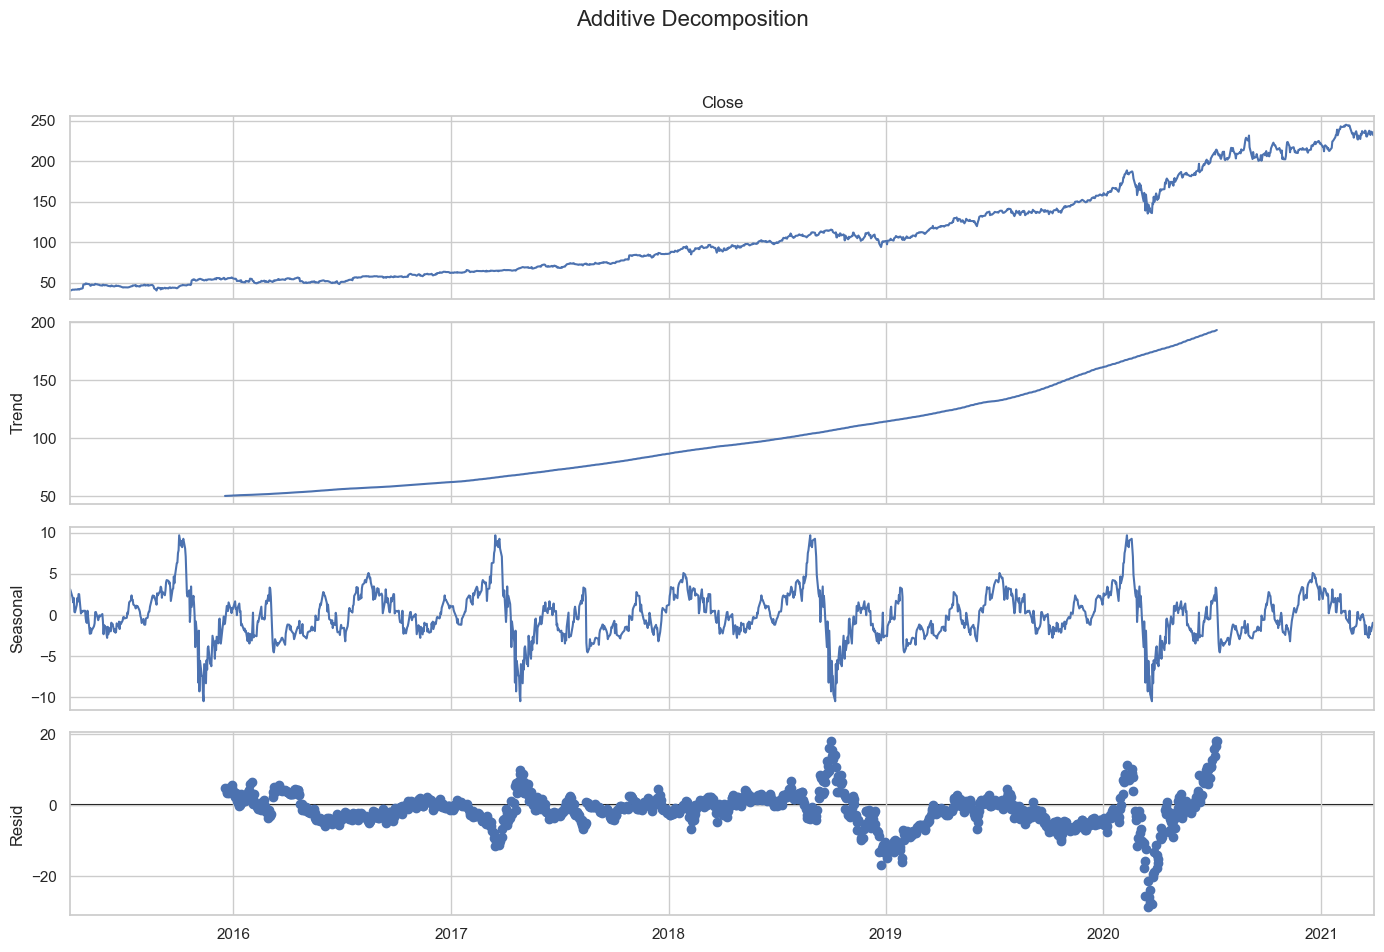

In [188]:
decomposition_additive = sm.tsa.seasonal_decompose(data['Close'], model='additive', period = 365)
plot_func(decomposition_additive, title='Additive Decomposition')

We can see that the series is multiplicative, given that the 2 previous graphs are similar.  
More about this: https://datascience.stackexchange.com/questions/46050/additive-vs-multiplicative-model-in-time-series-data

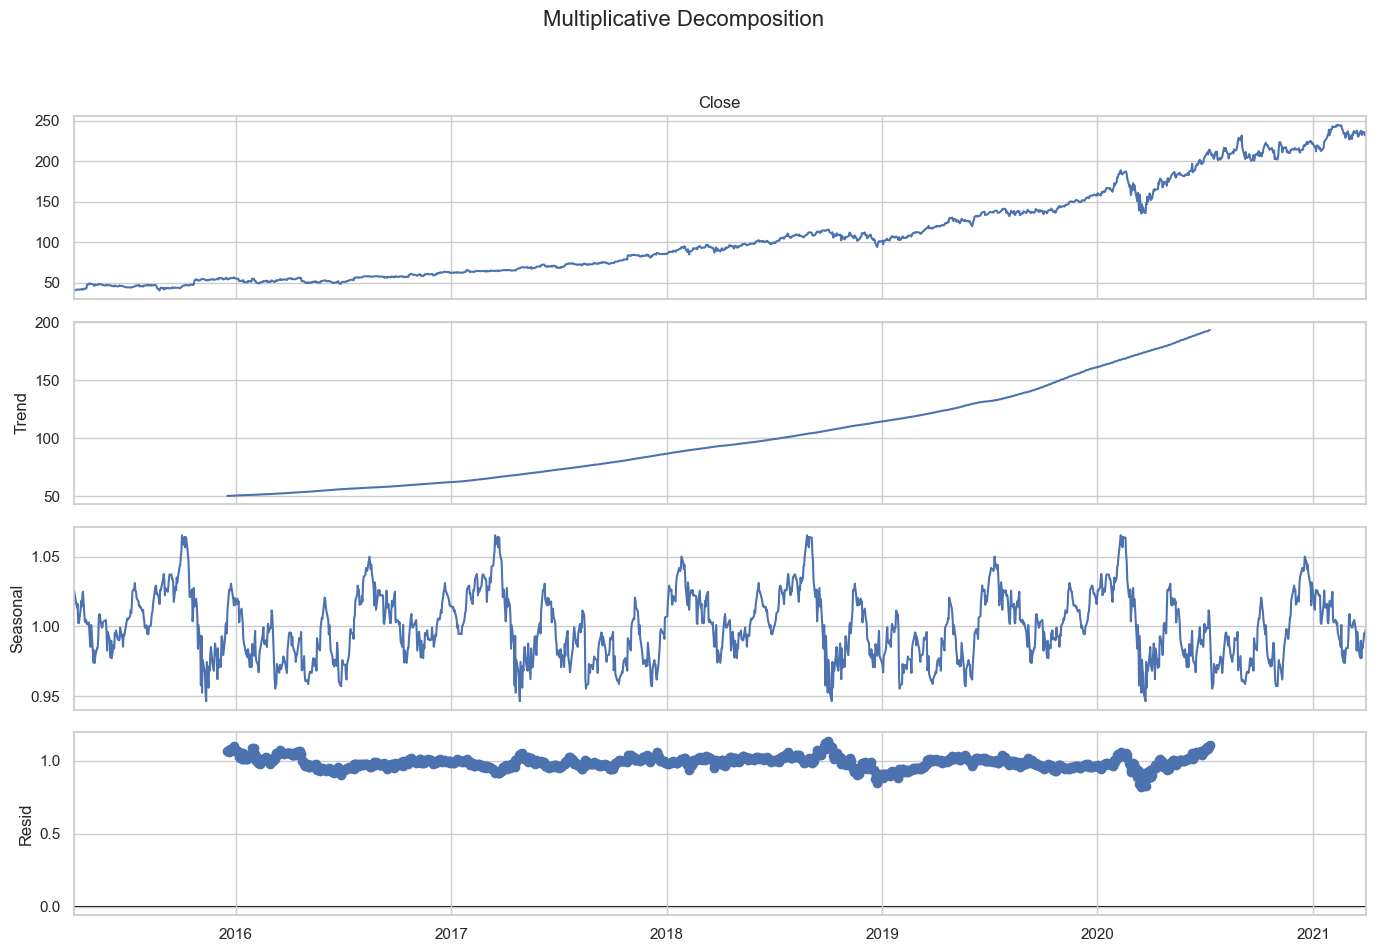

In [189]:
decomposition_multiplicative = sm.tsa.seasonal_decompose(data['Close'], model='multiplicative', period = 365)
plot_func(decomposition_multiplicative, title='Multiplicative Decomposition')

We can see the annual seasonality and trend.

## Stationarity series

Let's check whether our data is stationary. To do this, we will run Adfuller and Kwiatkowski-Phillips-Schmidt-Sheen (KPSS) tests for each numerical column.

In [190]:
columns = ['Open','High','Low','Close','Volume']

### Adfuller/Kpss tests

In [191]:
for i in columns:
    ad_test(data[i])
    test_kpss(data[i])
    print('\n')


AD_TEST: the data of Open is not stationary series
KPSS_TEST: The data of Open is not a stationary series


AD_TEST: the data of High is not stationary series
KPSS_TEST: The data of High is not a stationary series


AD_TEST: the data of Low is not stationary series
KPSS_TEST: The data of Low is not a stationary series


AD_TEST: the data of Close is not stationary series
KPSS_TEST: The data of Close is not a stationary series


AD_TEST: the data of Volume is stationary series
KPSS_TEST: The data of Volume is a stationary series




It has been verified that ignoring warnings does not affect the test results. The testing was done manually, and to get a better understanding of the picture, we will remove Warnings.

### FE for stationarity series

*Based on the results of the tests, we see that our series is not stationary. For the correct determination of AR and MA, as well as further forecasting, we will make the series stationary.*

In [192]:
data_st =  data[['Close', 'Open', 'High', 'Low']].diff().dropna()

In [193]:
data_st['Volume'] = data['Volume']

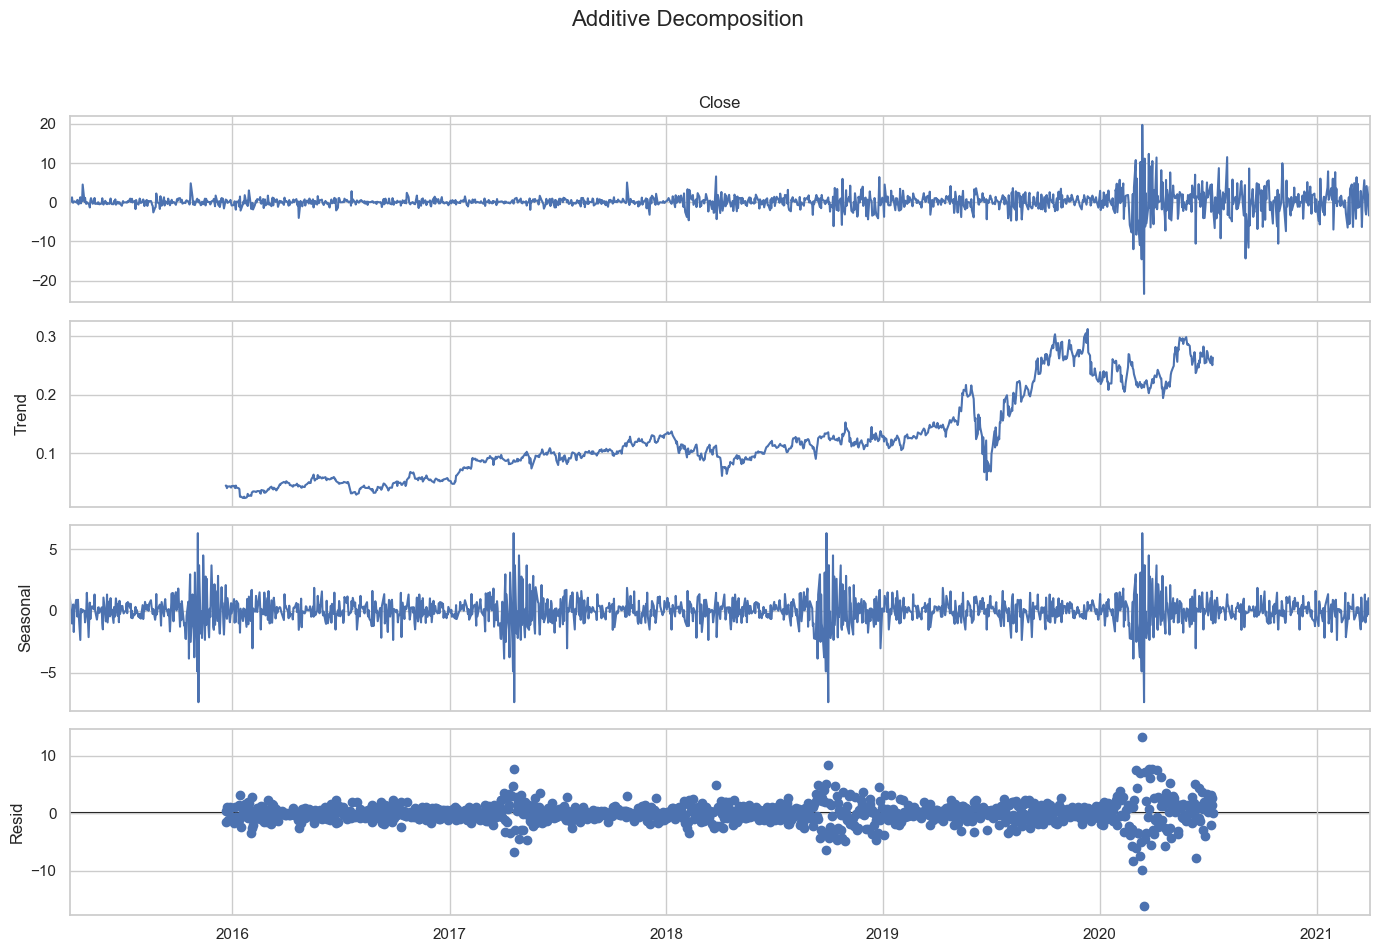

In [194]:
decomposition_additive = sm.tsa.seasonal_decompose(data_st['Close'], model='additive', period = 365)
plot_func(decomposition_additive, title='Additive Decomposition')

In [195]:
for i in data_st.columns:
    ad_test(data_st[i])
    test_kpss(data_st[i])
    print('\n')


AD_TEST: the data of Close is stationary series
KPSS_TEST: The data of Close is a stationary series


AD_TEST: the data of Open is stationary series
KPSS_TEST: The data of Open is a stationary series


AD_TEST: the data of High is stationary series
KPSS_TEST: The data of High is a stationary series


AD_TEST: the data of Low is stationary series
KPSS_TEST: The data of Low is a stationary series


AD_TEST: the data of Volume is stationary series
KPSS_TEST: The data of Volume is a stationary series


